In [1]:
import numpy as np, matplotlib.pyplot as plt, cv2
import cvflow as cf
from cvflow import *
import laneFindingPipeline
from jupyterTools import src
%matplotlib inline

In [2]:
problemAreas = dict(
    project=[(1000, 1050)],
    challenge=[(103,163),(162,194)],
    harder_challenge=[
        (160, 235), (265, 355), 
        (380, 405), (581, 620), 
        (652, 705), (731, 777),
        (800, 833), (853, 911),
        (972, 1017), (1061, 1091),
        
    ]
)

In [3]:
allFrames = laneFindingPipeline.utils.loadFrames(pbar=True)

HBox(children=(IntProgress(value=0, description='load project: ', max=1260), HTML(value='')))

HBox(children=(IntProgress(value=0, description='load challenge: ', max=484), HTML(value='')))

HBox(children=(IntProgress(value=0, description='load harder_challenge: ', max=1199), HTML(value='')))

In [4]:
pipeline = FullPipeline()
laneFinder = laneFindingPipeline.LaneFinder(colorFilter=pipeline)

HBox(children=(IntProgress(value=0, description='cal. undistort: ', max=20), HTML(value='')))

In [12]:
videoLabel = 'project'
start, stop = problemAreas[videoLabel][0]
frames = allFrames[videoLabel][start:stop]

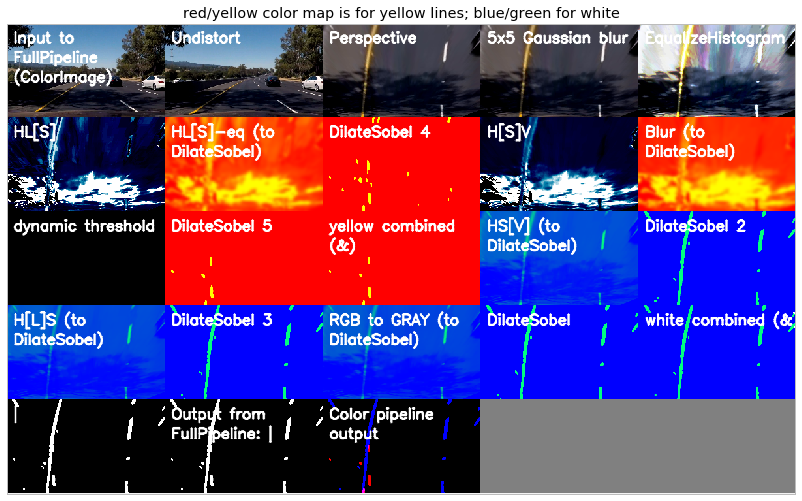

In [6]:
pipeline(frames[int(len(frames)*.9)])
pipeline.showMembersFast(show=True, title='red/yellow color map is for yellow lines; blue/green for white');

In [13]:
pipeline.saveSubgraphDrawing('tests/%s' % pipeline, format='pdf');

In [14]:
vid = laneFinder.process(frames, 'tests/%s%d_%d.mp4' % (videoLabel, start, stop), showSteps=True)
vid

HBox(children=(IntProgress(value=0, description='project1000_1050.mp4: ', max=50), HTML(value='')))

In [26]:
class VidList:
    def __init__(self, vids):
        self.vids = vids
    def _repr_html_(self):
        return '<br/>'.join([vid.data for vid in self.vids])

In [28]:
def check(laneFinder, videoLabel, whichProblem='all'):
    pipeline = laneFinder.colorFilter
    if whichProblem == 'all':
        problems = problemAreas[videoLabel] 
    else:
        problems = [problemAreas[videoLabel][whichProblem]]
    vids = []
    for problem in tqdm.tqdm_notebook(problems, unit='problem'):
        start, stop = problem
        frames = allFrames[videoLabel][start:stop]
        vid = laneFinder.process(frames, 'tests/%s-%d_%d.mp4' % (videoLabel, start, stop), showSteps=True)
        frame = frames[int(len(frames)*.8)]
        pipeline(frame)
        pipeline.showMembersFast(
            show=True, 
            title='%s: red/yellow color map is for yellow lines; blue/green for white' % videoLabel
        );
        vids.append(vid)
    return VidList(vids)

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, description='project-1000_1050.mp4: ', max=50), HTML(value='')))

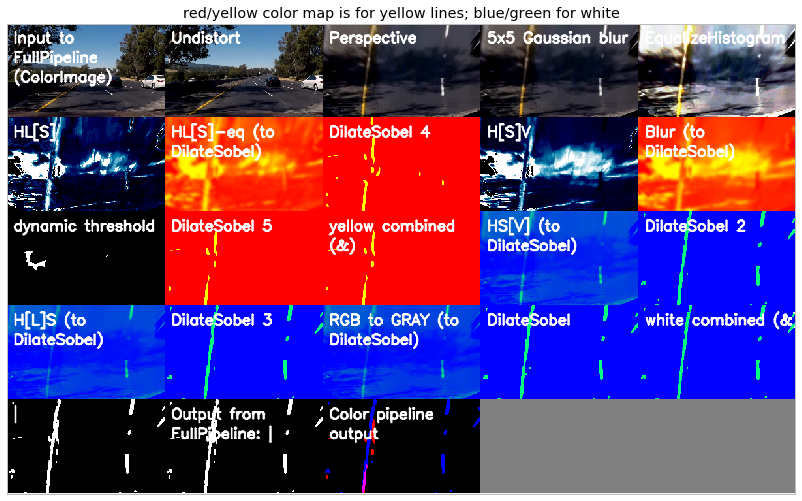

In [29]:
check(laneFinder, 'project')

HBox(children=(IntProgress(value=0, max=2), HTML(value='')))

HBox(children=(IntProgress(value=0, description='challenge-103_163.mp4: ', max=60), HTML(value='')))

HBox(children=(IntProgress(value=0, description='challenge-162_194.mp4: ', max=32), HTML(value='')))

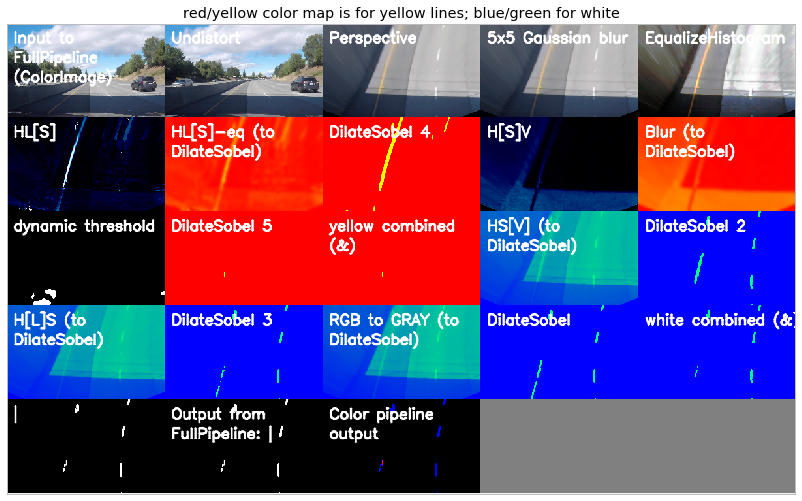

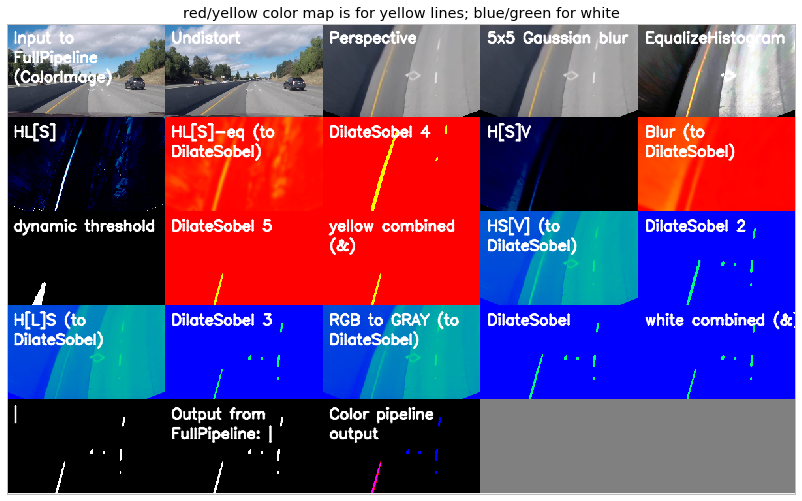

In [30]:
check(laneFinder, 'challenge')

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

HBox(children=(IntProgress(value=0, description='harder_challenge-160_235.mp4: ', max=75), HTML(value='')))

HBox(children=(IntProgress(value=0, description='harder_challenge-265_355.mp4: ', max=90), HTML(value='')))

HBox(children=(IntProgress(value=0, description='harder_challenge-380_405.mp4: ', max=25), HTML(value='')))

HBox(children=(IntProgress(value=0, description='harder_challenge-581_620.mp4: ', max=39), HTML(value='')))

HBox(children=(IntProgress(value=0, description='harder_challenge-652_705.mp4: ', max=53), HTML(value='')))

HBox(children=(IntProgress(value=0, description='harder_challenge-731_777.mp4: ', max=46), HTML(value='')))

HBox(children=(IntProgress(value=0, description='harder_challenge-800_833.mp4: ', max=33), HTML(value='')))

HBox(children=(IntProgress(value=0, description='harder_challenge-853_911.mp4: ', max=58), HTML(value='')))

HBox(children=(IntProgress(value=0, description='harder_challenge-972_1017.mp4: ', max=45), HTML(value='')))

HBox(children=(IntProgress(value=0, description='harder_challenge-1061_1091.mp4: ', max=30), HTML(value='')))

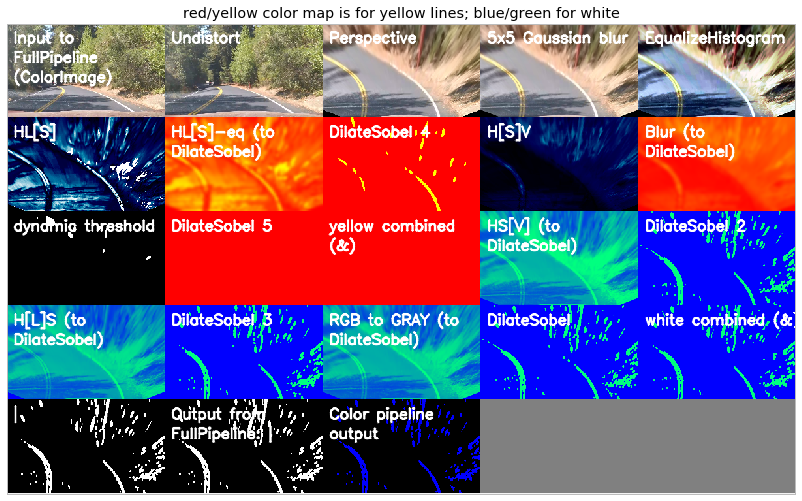

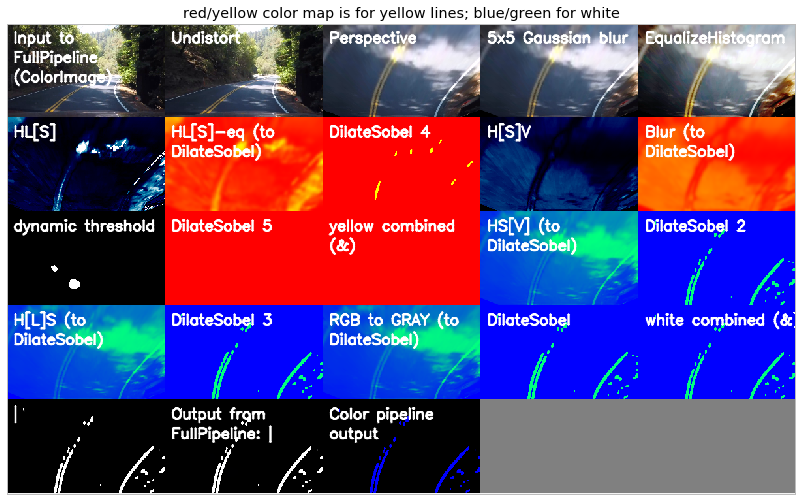

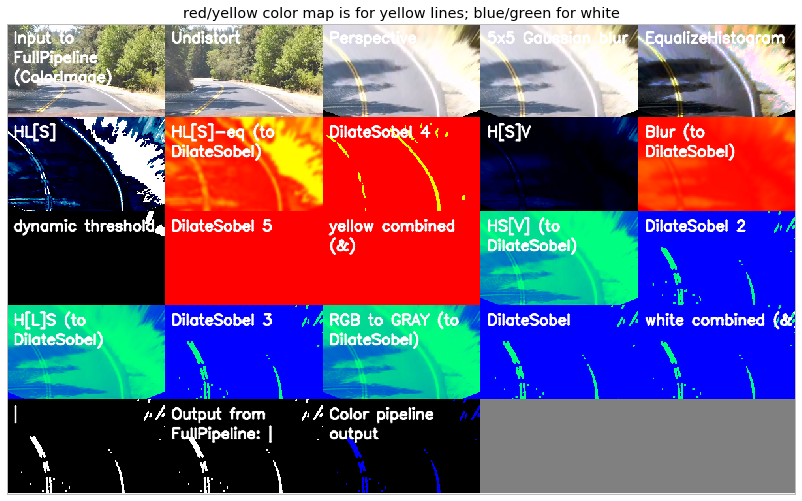

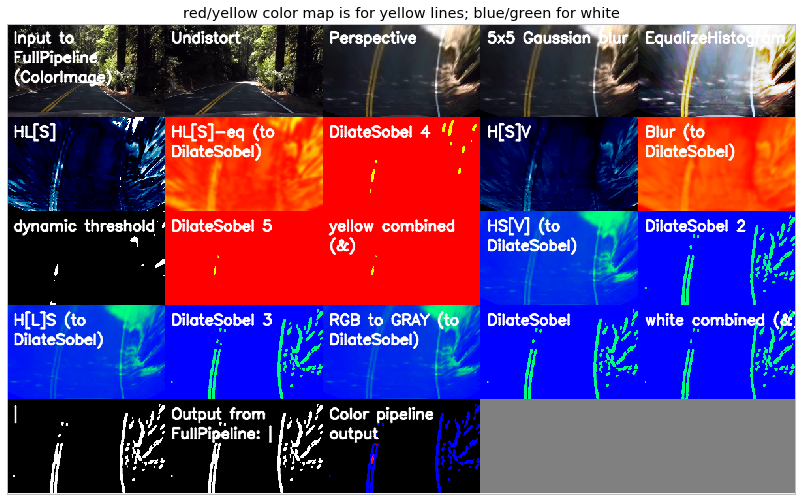

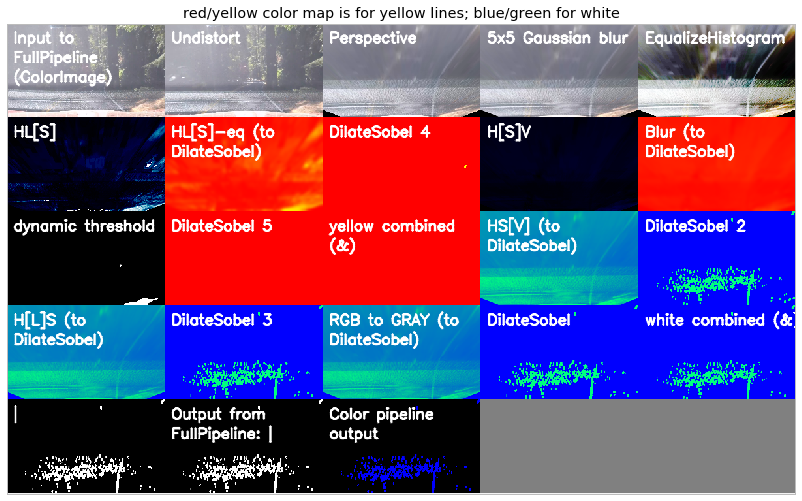

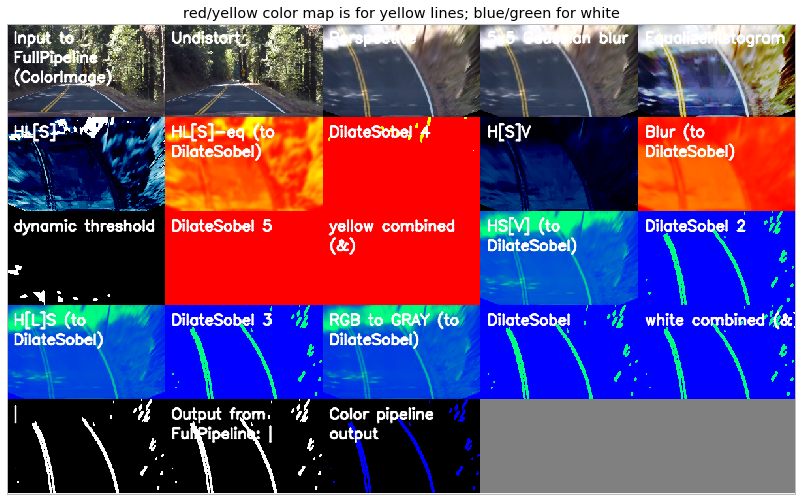

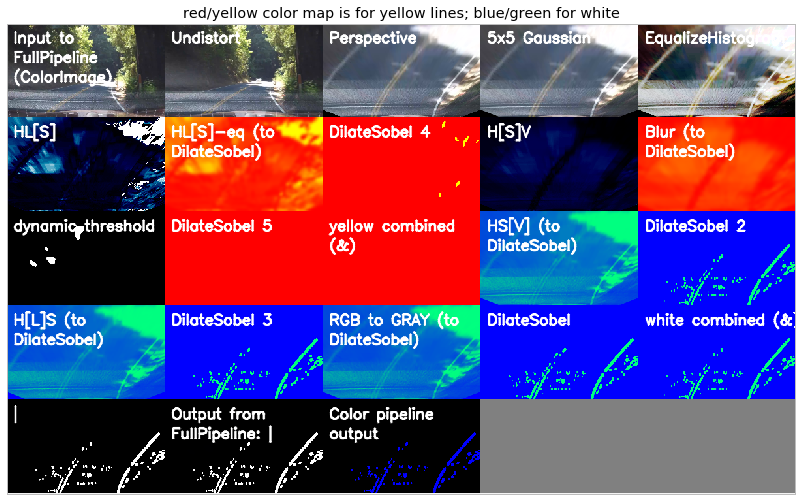

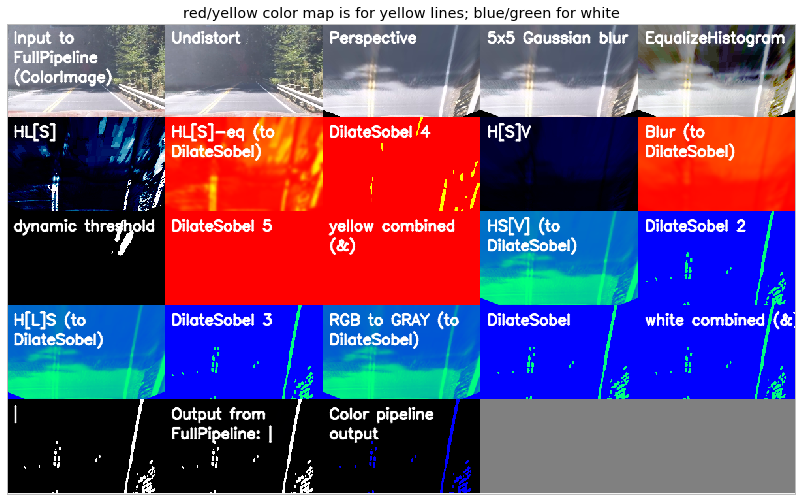

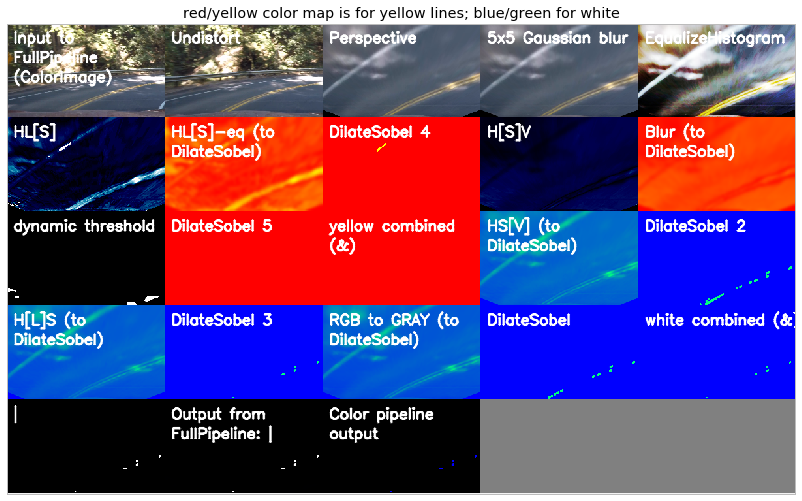

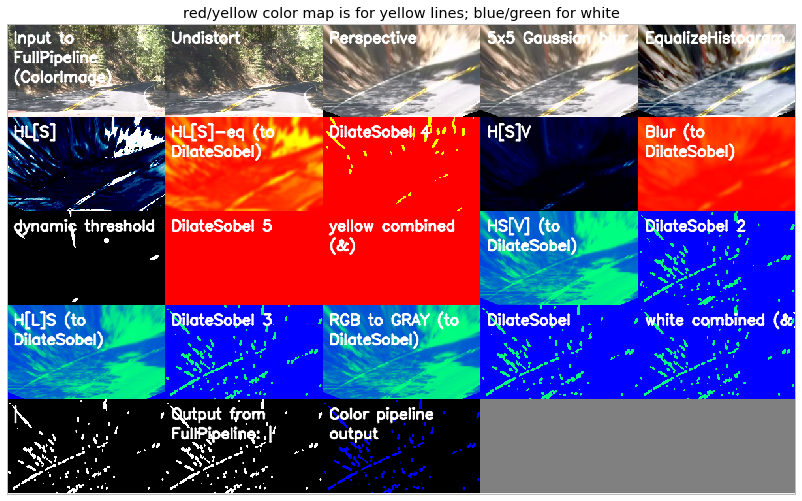

In [31]:
check(laneFinder, 'harder_challenge')